# Ensemble



In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns


import warnings
import itertools
from PIL import Image
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report


# !pip install visualkeras
import tensorflow as tf
import visualkeras
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import numpy as np
from tensorflow.keras.layers import Input, Lambda, Bidirectional, LSTM, Dense, concatenate
from tensorflow.keras.models import Model
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

**Load images**

In [5]:
# pip install opencv-python
import cv2
import os

folder_path = "ds_two"             # base/root directory

no_tumor = os.listdir(folder_path + '/no_tumor/')
glioma = os.listdir(folder_path + '/glioma/')
meningioma = os.listdir(folder_path + '/meningioma/')
pituitary = os.listdir(folder_path + '/pituitary/')
craniopharyngioma = os.listdir(folder_path + '/craniopharyngioma_final_1070/')

# no_tumor, glioma, meningioma, pituitary, craniopharyngioma

dataset=[]
lab=[]

In [6]:
for image_name in no_tumor:
    image=cv2.imread(folder_path + '/no_tumor/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(0)

In [7]:
for image_name in glioma:
    image=cv2.imread(folder_path + '/glioma/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(1)

In [8]:
for image_name in meningioma:
    image=cv2.imread(folder_path + '/meningioma/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(2)

In [9]:
for image_name in pituitary:
    image=cv2.imread(folder_path + '/pituitary/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(3)

In [10]:
for image_name in craniopharyngioma:
    image=cv2.imread(folder_path + '/craniopharyngioma_final_1070/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(4)

In [11]:
dataset = np.array(dataset)
lab = np.array(lab)
print(dataset.shape, lab.shape)

(8103, 240, 240, 3) (8103,)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(dataset, lab, test_size=0.2, shuffle=True, random_state=42)

print('Training data and target sizes: \n{}, {}'.format(x_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(x_test.shape,y_test.shape))

Training data and target sizes: 
(6482, 240, 240, 3), (6482,)
Test data and target sizes: 
(1621, 240, 240, 3), (1621,)


In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train.shape, x_test.shape

((6482, 240, 240, 3), (1621, 240, 240, 3))

In [15]:
y_train.shape, y_test.shape

((6482,), (1621,))

In [17]:
y_train.shape, y_test.shape

((6482,), (1621,))

In [19]:
from keras.preprocessing.image import ImageDataGenerator

**Data augmentation**

In [20]:
augment = ImageDataGenerator(
                             rotation_range=20,
                              width_shift_range=0.01,
                              height_shift_range=0.01,
                              horizontal_flip=False,
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

**Deep Ensemble**

VGG16, DenseNet and InceptionNet

In [22]:
ensemble_model = tf.keras.models.load_model("dl_ensemble.h5")

ensemble_model.evaluate(x_test,y_test)

51/51 [==============================] - 229s 4s/step - loss: 1.1547 - accuracy: 0.9112


[1.1547116041183472, 0.9111659526824951]

**Testing Ensemble Model**

In [23]:
from sklearn.metrics import classification_report

# Predict labels on the test set
y_pred = ensemble_model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

51/51 [==============================] - 258s 5s/step


In [24]:
print(y_pred_classes.shape, y_test.shape)

(1621,) (1621,)


In [25]:
# Get class names
class_names = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma_final_1070']


classification_rep = classification_report(y_test, y_pred_classes, target_names=class_names)

# Print classification report
print(classification_rep)

                              precision    recall  f1-score   support

                    no_tumor       0.95      0.95      0.95       414
                      glioma       0.91      0.89      0.90       335
                  meningioma       0.84      0.76      0.80       339
                   pituitary       0.88      1.00      0.93       345
craniopharyngioma_final_1070       0.99      0.97      0.98       188

                    accuracy                           0.91      1621
                   macro avg       0.92      0.91      0.91      1621
                weighted avg       0.91      0.91      0.91      1621



In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_classes)

0.8999150569903981

In [27]:
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, y_pred_classes)
cm_df = pd.DataFrame(cm,
                     index = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma_final_1070'],

                     columns = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma_final_1070'])

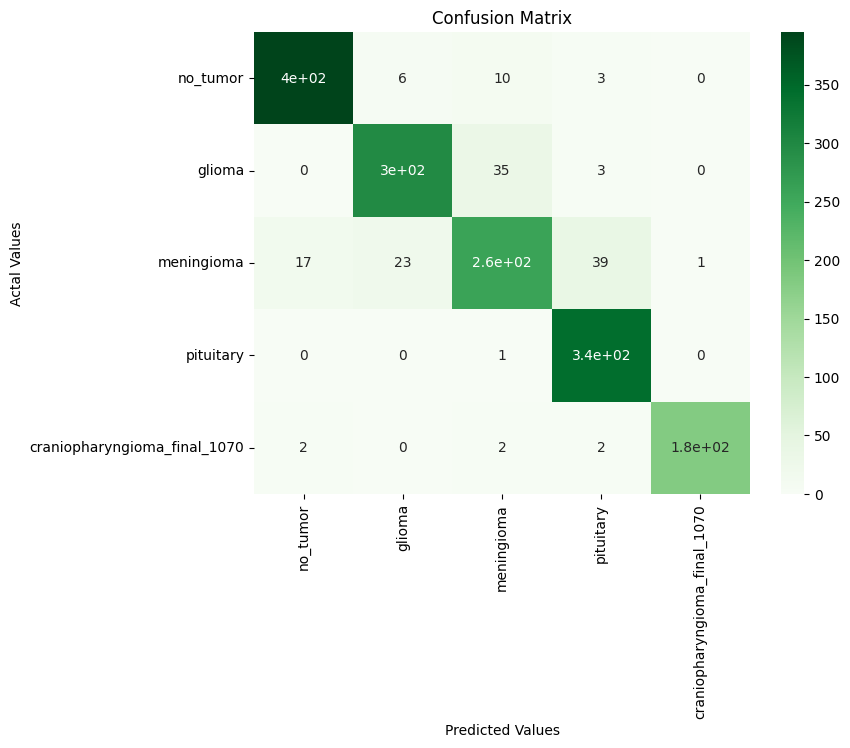

In [28]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Greens")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_classes)

0.9111659469463295

In [30]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_classes,average='macro')

0.9166256697985377

In [31]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_classes,average='macro')

0.9139743598881424

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_classes,average='macro')

0.9141033952252459

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_classes,average='micro')

0.9111659469463295

In [34]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_classes,average='micro')

0.9111659469463295

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_classes,average='micro')

0.9111659469463295

In [36]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_classes,average='weighted')

0.9109797770107413

In [37]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_classes,average='weighted')

0.9111659469463295

In [38]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_classes,average='weighted')

0.9098250613638044

51/51 [==============================] - 234s 5s/step


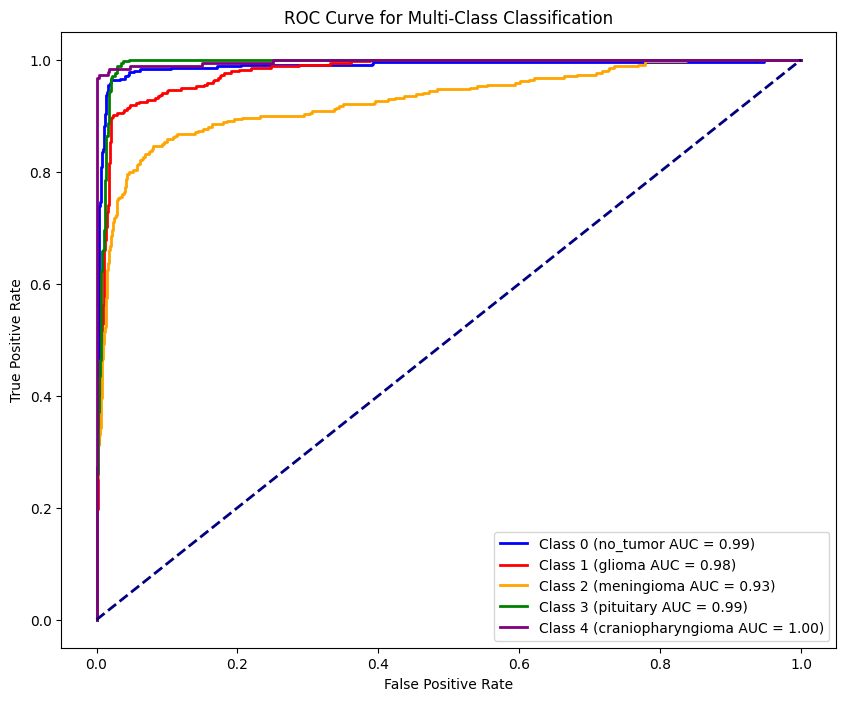

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

classes = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma']

y_true = y_test
raw_predictions = ensemble_model.predict(x_test)

y_prob = scipy.special.softmax(raw_predictions, axis=-1)

# Binarize the true labels
y_true_bin = label_binarize(y_true, classes=np.arange(9))

# Initialize variables
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define colors for each class
colors = ['blue', 'red',  'orange', 'green', 'purple']

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} ({classes[i]} AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend()
plt.show()

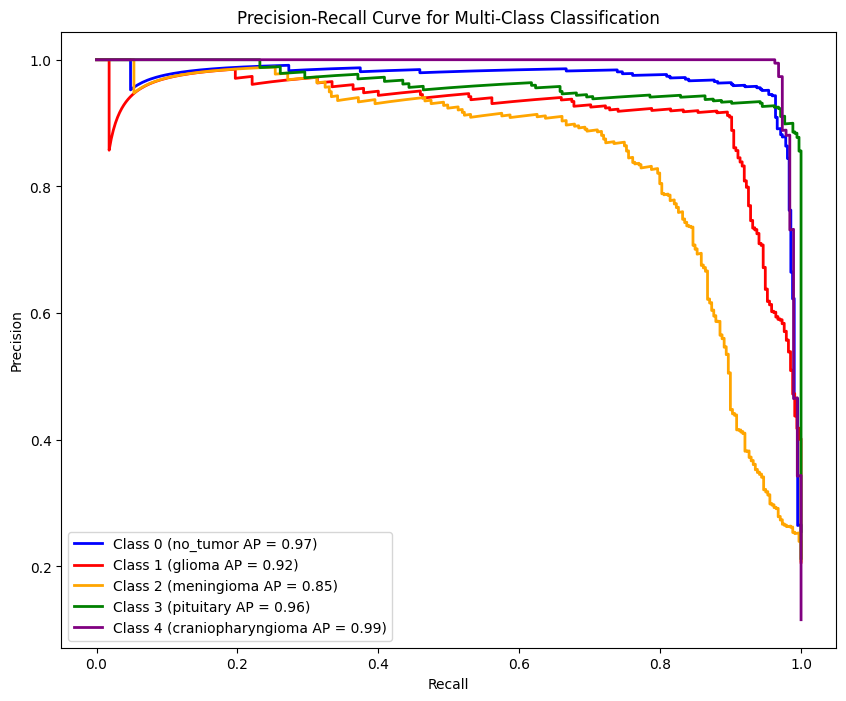

In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Initialize arrays for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_true_bin[:, i], y_prob[:, i])

# Define colors for each class
colors = ['blue', 'red',  'orange', 'green', 'purple']

# Plot the precision-recall curves
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(recall[i], precision[i], color=colors[i], lw=2, label=f'Class {i} ({classes[i]} AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class Classification')
plt.legend()
plt.show()

[[395   6  10   3   0]
 [  0 297  35   3   0]
 [ 17  23 259  39   1]
 [  0   0   1 344   0]
 [  2   0   2   2 182]]


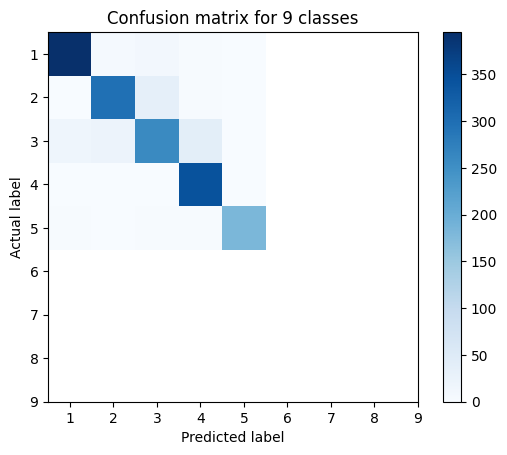

In [48]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Find the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(5), np.arange(1, 10))
plt.yticks(np.arange(5), np.arange(1, 10))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix for 5 classes')
plt.show()

In [49]:
# Import numpy library
import numpy as np

# # Define the confusion matrix
cm = np.array([[395,   6 , 10 ,  3 ,  0],
 [  0, 297 , 35 ,  3 ,  0],
 [ 17,  23 , 259 , 39 ,  1],
 [  0 ,  0 ,  1 , 344 ,  0],
 [  2 , 0 ,  2 ,  2 , 182]])

# Get the number of classes
n_classes = cm.shape[0]

# Initialize an empty list to store the specificity values
specificity = []

# Loop over each class
for i in range(n_classes):
  # Calculate the true negatives and false positives for class i
  tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i])
  fp = np.sum(cm[:, i]) - cm[i, i]

  # Calculate the specificity for class i
  spec = tn / (tn + fp)

  # Append the specificity to the list
  specificity.append(spec)

# Print the specificity values
print("Specificity for each class:")
for i in range(n_classes):
  print(f"Class {i}: {specificity[i]:.2f}")


Specificity for each class:
Class 0: 0.98
Class 1: 0.97
Class 2: 0.95
Class 3: 0.95
Class 4: 1.00


In [50]:
# Import numpy library
import numpy as np

# Calculate the false positives, false negatives, true positives, and true negatives for each class
fp = np.sum(cm, axis=0) - np.diag(cm)
fn = np.sum(cm, axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = np.sum(cm) - (fp + fn + tp)

# Calculate the false positive rate, false negative rate, true positive rate, and true negative rate for each class
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Print the FPR, FNR, TPR, and TNR values for each class
print("FPR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {fpr[i]:.2f}")

print("FNR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {fnr[i]:.2f}")

print("TPR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {tpr[i]:.2f}")

print("TNR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {tnr[i]:.2f}")

FPR for each class:
Class 0: 0.02
Class 1: 0.02
Class 2: 0.04
Class 3: 0.04
Class 4: 0.00
FNR for each class:
Class 0: 0.05
Class 1: 0.11
Class 2: 0.24
Class 3: 0.00
Class 4: 0.03
TPR for each class:
Class 0: 0.95
Class 1: 0.89
Class 2: 0.76
Class 3: 1.00
Class 4: 0.97
TNR for each class:
Class 0: 0.98
Class 1: 0.98
Class 2: 0.96
Class 3: 0.96
Class 4: 1.00
